# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [2]:
ds.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [3]:
# Encontrar la fila con el precio más alto
max_price_row = ds.loc[ds['price'].idxmax()]

# Imprimir el resultado en el formato solicitado
print(f"La casa con la dirección '{max_price_row['address']}' es la más cara y su precio es de '{max_price_row['price']}'USD")

La casa con la dirección 'El Escorial' es la más cara y su precio es de '8500000'USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [4]:
# Filtrar precios mayores a cero
precios_validos = ds[ds['price'] > 0]

# Encontrar la fila con el precio más bajo (mayor a cero)
min_price_row = precios_validos.loc[precios_validos['price'].idxmin()]

# Imprimir el resultado en el formato solicitado
print(f"La casa con la dirección '{min_price_row['address']}' es la más barata y su precio es de '{min_price_row['price']}' USD")


La casa con la dirección 'Berlin, Coslada' es la más barata y su precio es de '600' USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [9]:
# Encontrar la fila con la mayor superficie
max_surface_row = ds.loc[ds['surface'].idxmax()]

# Encontrar la fila con la menor superficie
min_surface_row = ds.loc[ds['surface'].idxmin()]

# Imprimir el resultado en el formato solicitado
print(f"La casa más grande está ubicada en '{max_surface_row['address']}' y su superficie es de '{max_surface_row['surface']}'metros")
print(f"La casa más pequeña está ubicada en '{min_surface_row['address']}' y su superficie es de '{min_surface_row['surface']}'metros")

La casa más grande está ubicada en 'Sevilla la Nueva' y su superficie es de '249000.0'metros
La casa más pequeña está ubicada en 'Calle Amparo,  Madrid Capital' y su superficie es de '15.0'metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [11]:
# Obtener valores únicos de la columna 'Level5'
unique_values = ds['level5'].dropna().unique()

# Convertir a cadena y unir con comas
print(', '.join(map(str, unique_values)))

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [12]:
# Limpiar nombres de columnas
ds.columns = ds.columns.str.strip()

# Iterar por cada columna y verificar si contiene NaNs
for col in ds.columns:
    has_na = ds[col].isna().any()
    print(f"{has_na} - {col}")

False - Unnamed: 0
False - id_realEstates
False - isNew
True - realEstate_name
True - phone_realEstate
False - url_inmueble
True - rooms
True - bathrooms
True - surface
False - price
False - date
True - description
False - address
False - country
False - level1
False - level2
False - level3
True - level4
False - level5
True - level6
True - level7
True - level8
False - upperLevel
False - countryId
False - level1Id
False - level2Id
False - level3Id
False - level4Id
False - level5Id
False - level6Id
False - level7Id
False - level8Id
False - accuracy
False - latitude
False - longitude
True - zipCode
True - customZone


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [13]:
# Guardar dimensiones originales
original_shape = ds.shape

# Eliminar filas con cualquier NaN
ds_clean = ds.dropna()

# Guardar dimensiones después de limpieza
clean_shape = ds_clean.shape

# Imprimir comparación
print(f"Dimensiones originales: {original_shape[0]} filas, {original_shape[1]} columnas")
print(f"Dimensiones después de eliminar NAs: {clean_shape[0]} filas, {clean_shape[1]} columnas")

Dimensiones originales: 15335 filas, 37 columnas
Dimensiones después de eliminar NAs: 0 filas, 37 columnas


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [15]:
# Filtrar población

filtro = ds['level5'] == "Arroyomolinos (Madrid)"
precio_promedio = ds.loc[filtro, 'price'].mean()

# Imprimir el resultado

print(f"El precio promedio de las casas en Arroyomolinos (Madrid) es de {precio_promedio:.2f}")

El precio promedio de las casas en Arroyomolinos (Madrid) es de 294541.60


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


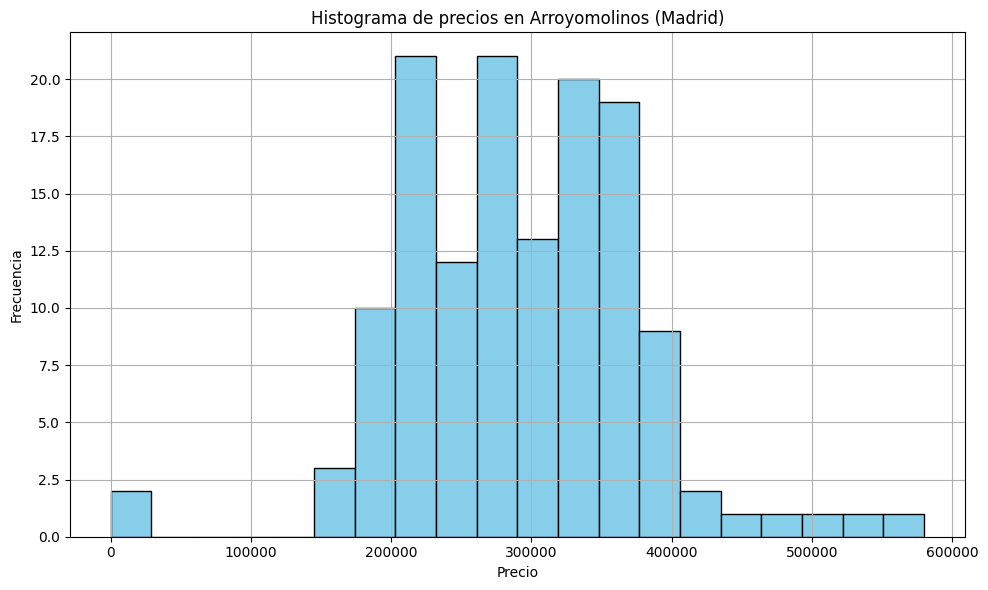

In [18]:
import matplotlib.pyplot as plt

# Filtrar población

filtro = ds['level5'] == "Arroyomolinos (Madrid)"
precios_filtrados = ds.loc[filtro, 'price'].dropna()

# Generar histograma
plt.figure(figsize=(10, 6))
plt.hist(precios_filtrados, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de precios en Arroyomolinos (Madrid)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

**Observaciones:** Se evidencia que los precios de las viviendas en la población de Arroyomolinos (Madrid) tienen una distribución normal, la mayoría de los predios tienen precios cercanos al valor promedio. Así mismo, son escazos los predios con valores extremos (superior a los  400.000uds). 

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [22]:
# Precio promedio en Valdemorillo

valdemorillo_avg = ds.loc[ds['level5'] == 'Valdemorillo', 'price'].mean()

# Precio promedio en Galapagar

galapagar_avg = ds.loc[ds['level5'] == 'Galapagar', 'price'].mean()

# Imprimir resultados
print(f"Precio promedio en Valdemorillo: {valdemorillo_avg:,.2f} USD")
print(f"Precio promedio en Galapagar: {galapagar_avg:,.2f} USD")

Precio promedio en Valdemorillo: 363,860.29 USD
Precio promedio en Galapagar: 360,063.20 USD


**Observaciones:**  El precio promedio de las viviendas en las poblaciones de Valdemorillo y Galapagar son muy similares, se podría interpretar que las características de estas poblaciones son muy similares y cualquiera de las dos puede ser una muy buena opción para los compradores

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [23]:
# Promedio de superficie en Valdemorillo

valdemorillo_surface_avg = ds.loc[ds['level5'] == 'Valdemorillo', 'surface'].mean()

# Promedio de superficie en Galapagar

galapagar_surface_avg = ds.loc[ds['level5'] == 'Galapagar', 'surface'].mean()

# Imprimir resultados
print(f"Superficie promedio en Valdemorillo: {valdemorillo_surface_avg:,.2f} m²")
print(f"Superficie promedio en Galapagar: {galapagar_surface_avg:,.2f} m²")

Superficie promedio en Valdemorillo: 350.02 m²
Superficie promedio en Galapagar: 305.52 m²


**Observaciones:** A pesar de tener precios promedio muy similares entre las poblaciones de Valdemorillo y Galapagar, se evidencia que los predios de Valdemorillo son más grandes, teniendo como resultado que el precio por metro cuadrado sea más favorable en esta población para los futuros compradores.

#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

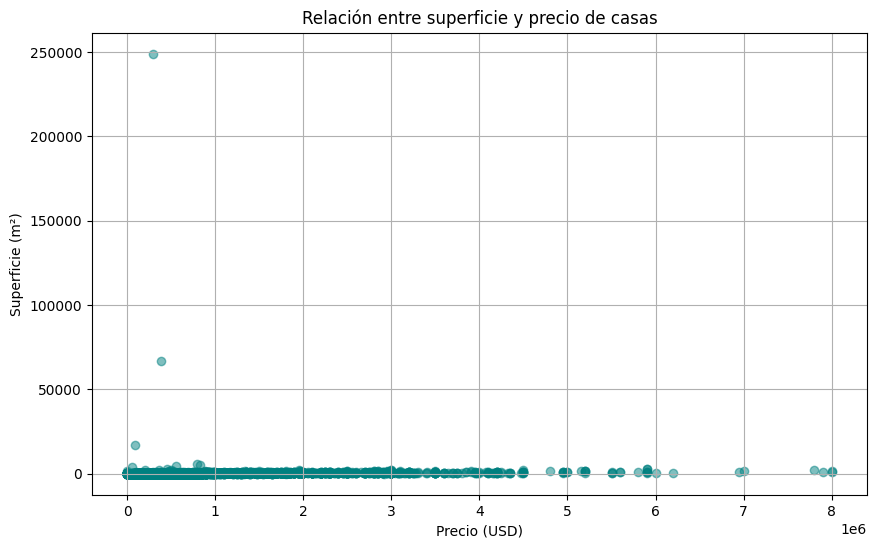

In [26]:
# Crear el scatter plot para análisis

plt.figure(figsize=(10, 6))
plt.scatter(ds['price'], ds['surface'], alpha=0.5, c='teal')
plt.title('Relación entre superficie y precio de casas')
plt.xlabel('Precio (USD)')
plt.ylabel('Superficie (m²)')
plt.grid(True)
plt.show()

**Observaciones:** La escala de las variables es diferente y causa que en el gráfico no se logre visualizar alguna tendencia, da la impresión que los predios sin importar su superficie tiene valores desde 0 hasta los 8.000.000
Es necesario escalar los valores para comparar correctamente.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [30]:
# Imprimir valores únicos

valores_unicos = ds['realEstate_name'].dropna().unique()
print("Valores únicos en 'realEstate_name':")
print(valores_unicos)

# Imprimir cantidad de valores únicos

cantidad_unicos = len(valores_unicos)
print(f"\nCantidad de agencias de bienes raíces en el dataset: {cantidad_unicos}")

Valores únicos en 'realEstate_name':
['ferrari 57 inmobiliaria' 'tecnocasa fuenlabrada ferrocarril'
 'look find boadilla' ... 'redpiso villaverde bajo san cristobal'
 'gestion comercial' 'nieves']

Cantidad de agencias de bienes raíces en el dataset: 1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [31]:
# Contar registros por población

conteo_poblaciones = ds['level5'].value_counts()

# Mostrar la población con más registros

poblacion_top = conteo_poblaciones.idxmax()
cantidad_top = conteo_poblaciones.max()

print(f"La población con más registros es '{poblacion_top}' con {cantidad_top} propiedades.")

La población con más registros es ' Madrid Capital' con 6643 propiedades.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [33]:
# Definir las poblaciones

poblaciones_objetivo = ['Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón']

# Filtrar el dataset

ds_subconjunto = ds[ds['level5'].isin(poblaciones_objetivo)]

# Mostrar las primeras filas del subconjunto

print(ds_subconjunto.head())

     Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
1             2       153867863  False  tecnocasa fuenlabrada ferrocarril   
3             4       152776331  False  tecnocasa fuenlabrada ferrocarril   
85           86       153152077  False            sinergical inmobiliaria   
94           95       153995577  False                    viviendas365com   
109         110       153586414  False    area uno asesores inmobiliarios   

     phone_realEstate                                       url_inmueble  \
1         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
3         916358736.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   
85                NaN  https://www.fotocasa.es/es/comprar/vivienda/le...   
94        911226014.0  https://www.fotocasa.es/es/comprar/vivienda/le...   
109       912664081.0  https://www.fotocasa.es/es/comprar/vivienda/ma...   

     rooms  bathrooms  surface   price  ... level6Id level7Id level8Id  \
1     

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

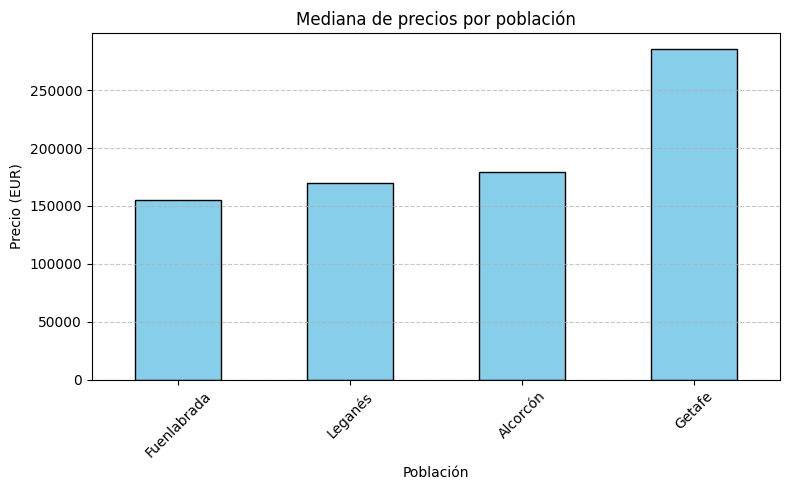

In [37]:
# Agrupar por población y calcular la mediana de precios

medianas_por_poblacion = ds_subconjunto.groupby('level5')['price'].median().sort_values()

# Crear el gráfico de barras

plt.figure(figsize=(8, 5))
medianas_por_poblacion.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalizar el gráfico

plt.title('Mediana de precios por población')
plt.xlabel('Población')
plt.ylabel('Precio (EUR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico

plt.tight_layout()
plt.show()

**Observaciones:** La población de Getafe destaca por tener el precio más alto y se podría interpretar que es la población con mejores condiciones de calidad de vida. Las poblaciones de Leganés y Alcorcón tienen comportamientos muy similares y se pueden convertir en opciones para un mismo segmento de compradores. Finalmente, la población de Fuenlabrada puede ser una población con potencial de valorización en el mediano y largo plazo.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [39]:
# Lista de variables a analizar

variables = ['price', 'rooms', 'surface', 'bathrooms']

# Calcular y mostrar media y varianza para cada variable

for var in variables:
    media = ds_subconjunto[var].mean()
    varianza = ds_subconjunto[var].var()
    print(f"{var}:")
    print(f"  Media     = {media:.2f}")
    print(f"  Varianza  = {varianza:.2f}\n")

price:
  Media     = 223094.48
  Varianza  = 14921367508.05

rooms:
  Media     = 3.02
  Varianza  = 0.72

surface:
  Media     = 111.75
  Varianza  = 4263.05

bathrooms:
  Media     = 1.63
  Varianza  = 0.57



#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [41]:
# Obtener el índice del registro con el precio máximo por población

idx_max_por_poblacion = ds_subconjunto.groupby('level5')['price'].idxmax()

# Extraer los registros correspondientes
propiedades_mas_caras = ds_subconjunto.loc[idx_max_por_poblacion]

# Imprimir población, dirección y precio
for _, fila in propiedades_mas_caras.iterrows():
    poblacion = fila['level5']
    direccion = fila['address']
    precio = fila['price']
    print(f"Población: {poblacion} | Dirección: {direccion} | Precio: {precio:.2f} USD")


Población: Alcorcón | Dirección: Alcorcón | Precio: 950000.00 USD
Población: Fuenlabrada | Dirección: Calle de Paulo Freire, 5, Fuenlabrada | Precio: 490000.00 USD
Población: Getafe | Dirección: Getafe | Precio: 1050000.00 USD
Población: Leganés | Dirección: Avenida Reina Sofía, Leganés | Precio: 650000.00 USD


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

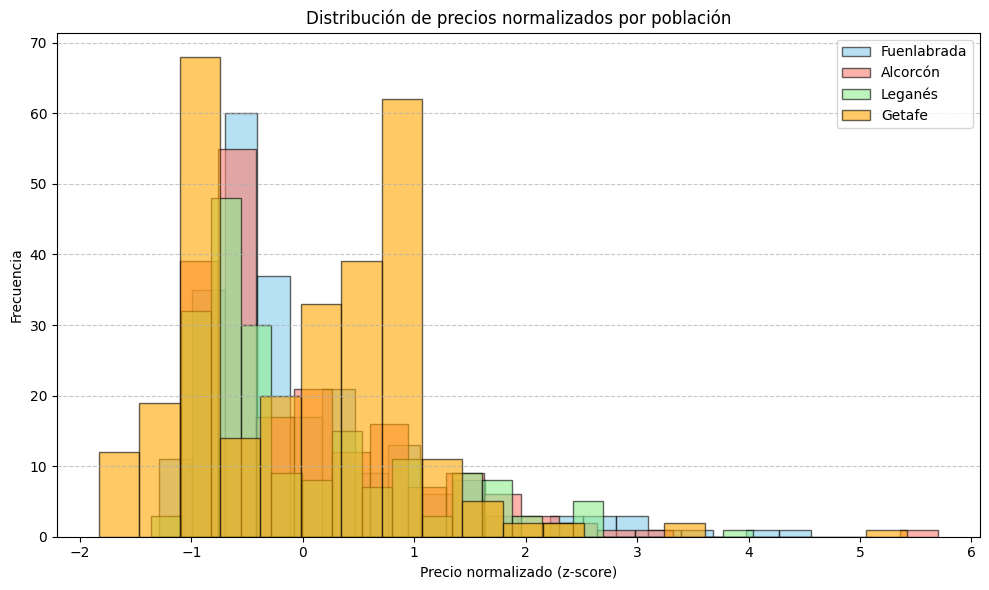

In [43]:
# Crear una copia del subconjunto para no modificar el original

df_norm = ds_subconjunto.copy()

# Normalizar 'Price' por población

df_norm['price_norm'] = df_norm.groupby('level5')['price'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Configurar el gráfico

plt.figure(figsize=(10, 6))
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']
poblaciones = df_norm['level5'].unique()

# Generar histogramas por población

for i, poblacion in enumerate(poblaciones):
    precios_norm = df_norm[df_norm['level5'] == poblacion]['price_norm']
    plt.hist(precios_norm, bins=20, alpha=0.6, label=poblacion, color=colors[i], edgecolor='black')

# Personalizar el gráfico

plt.title('Distribución de precios normalizados por población')
plt.xlabel('Precio normalizado (z-score)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observaciones** Para el caso de todas las poblaciones se ve que los valores se concentran en un z-score de 0, es decir que la mayoría de predios en las diferentes poblaciones están cercanas al valor promedio. El caso de Getafe muestra un alto número de predios con valores por debajo de la media, indica que a pesar de tener una mediana más alta, tiene una mayor variabilidad, hay precios con valores extremos (tanto altos como bajos) lo que puede representar oportunidades de inversión a bajo costo en una población con buenas condiciones de vida.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [51]:
# Filtrar el subconjunto de Getafe y Alcorcón

subset = ds_subconjunto[ds_subconjunto['level5'].isin(['Getafe', 'Alcorcón'])].copy()

# Calcular la columna 'pps'
subset['pps'] = subset['price'] / subset['surface']

# Calcular el promedio de 'pps' por población
pps_promedio = subset.groupby('level5')['pps'].mean()

# Imprimir el resultado
print("Precio promedio por metro cuadrado es:")
print(pps_promedio)


Precio promedio por metro cuadrado es:
level5
Alcorcón    2239.302480
Getafe      2066.314949
Name: pps, dtype: float64


**Observaciones:** El precio promedio por metro cuadrado es mayor en Alcorcón, en los análisis previos se veía que Getafe era la población con un mayor valor en la mediana de sus predios. Ahora, con este nuevo análisis se puede identificar que Alcorcón tiene viviendas más costosas al incluir la variable de la superficie.

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

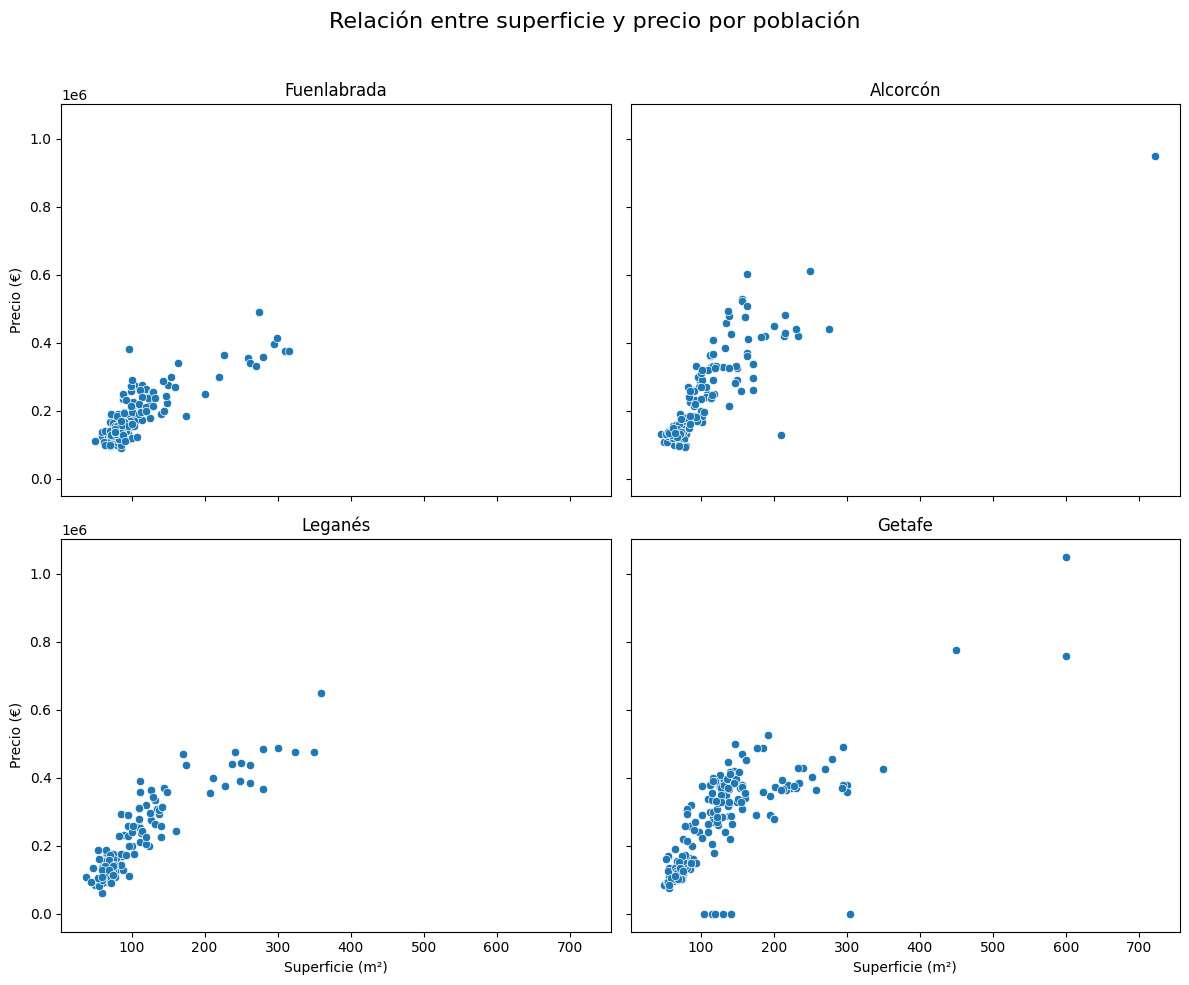

In [53]:
import seaborn as sns

# Obtener las poblaciones únicas en 'level5'

poblaciones = ds_subconjunto['level5'].unique()

# Crear figura y ejes

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

# Generar un gráfico de dispersión por cada población

for i, poblacion in enumerate(poblaciones):
    subset = ds_subconjunto[ds_subconjunto['level5'] == poblacion]
    sns.scatterplot(data=subset, x='surface', y='price', ax=axes[i])
    axes[i].set_title(f'{poblacion}')
    axes[i].set_xlabel('Superficie (m²)')
    axes[i].set_ylabel('Precio (€)')

# Ajustar diseño
plt.suptitle('Relación entre superficie y precio por población', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [54]:
from ipyleaflet import Map, basemaps

# Mapa centrado en Madrid
map = Map(center = (40.35, -3.8), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

**Conclusiones** 
Un ejercicio completo de limpieza de datos permite entender mejor las necesidades y comportamiento del negocio. De esta forma, se puede identificar mejor qué producto de datos tiene más valor. En este caso, se pueden hacer análisis desde el punto de vista de un comprador y/o un vendedor de inmuebles en España. Entendiendo las características de cada población y tomando la mejor decisión.